In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ajuda do Welton Vaz: https://github.com/weltonvaz
import matplotlib.lines as mlines
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats #stats.pearsonr(a,b)  calcula o coeficiente de correlação



%matplotlib inline
plt.rcParams['figure.figsize'] = (15,11)

In [131]:
#sns.distplot(df['column'])
#pd.value_counts(dataset['column'])

#df.loc[df['column'] == "x"]   #where SQL
#dataset.loc[(dataset['bedrooms']==3) & (dataset['bathrooms'] > 2)]
#dataset[dataset['bedrooms']==4].count()

#dataset.sort_values(by='price', ascending=False)
#dataset['size'] = (dataset['bedrooms']* 20)

In [132]:
df = pd.read_excel("funcionarios_MB.xls")

In [133]:
df["Idade_Anos"]= round((df["Idade_Anos"]+(df["Idade_Meses"]/12)),2)
df.drop(['id'], axis=1, inplace=True)
df.drop(['Idade_Meses'], axis=1, inplace=True)

In [134]:
df

,Est_Civil,Gr_Instruc,Num_Filhos,Sal_min,Idade_Anos,Reg_Proced
0,Solteiro,fundamental,0,4.00,26.25,Interior
1,Casado,fundamental,1,4.56,32.83,Capital
2,Casado,fundamental,2,5.25,36.42,Capital
3,Solteiro,medio,0,5.73,20.83,Outra
4,Solteiro,fundamental,0,6.26,40.58,Outra
5,Casado,fundamental,0,6.66,28.00,Interior
6,Solteiro,fundamental,0,6.86,41.00,Interior
7,Solteiro,fundamental,0,7.39,43.33,Capital
8,Casado,medio,1,7.44,34.83,Capital
9,Solteiro,medio,0,7.59,23.50,Outra


In [135]:
# paleta de cores 5-class Dark2, do ColorBrewer2: http://colorbrewer2.org/
cores = ['#1b9e77',         
         '#7570b3',
         '#66a61e']

In [136]:
# a função atribui_cor() aponta a cor correspondente a cada formacao.
def atribui_cor(formacao):
    cores = {"fundamental":'#1b9e77',
             "medio":'#7570b3',
             "superior":'#66a61e'
    }
    return cores.get(formacao, 'black')

In [137]:
# criando o vetor de cores.
cor_formacao = list()
qtde_formacoes = len(df['Gr_Instruc'])

In [138]:
for grau in range(qtde_formacoes):
    cor_formacao.append(atribui_cor(df['Gr_Instruc'][grau]))
    
print(cor_formacao)

['#1b9e77', '#1b9e77', '#1b9e77', '#7570b3', '#1b9e77', '#1b9e77', '#1b9e77', '#1b9e77', '#7570b3', '#7570b3', '#7570b3', '#1b9e77', '#7570b3', '#1b9e77', '#7570b3', '#7570b3', '#7570b3', '#1b9e77', '#66a61e', '#7570b3', '#7570b3', '#7570b3', '#1b9e77', '#66a61e', '#7570b3', '#7570b3', '#1b9e77', '#7570b3', '#7570b3', '#7570b3', '#66a61e', '#7570b3', '#66a61e', '#66a61e', '#7570b3', '#66a61e']


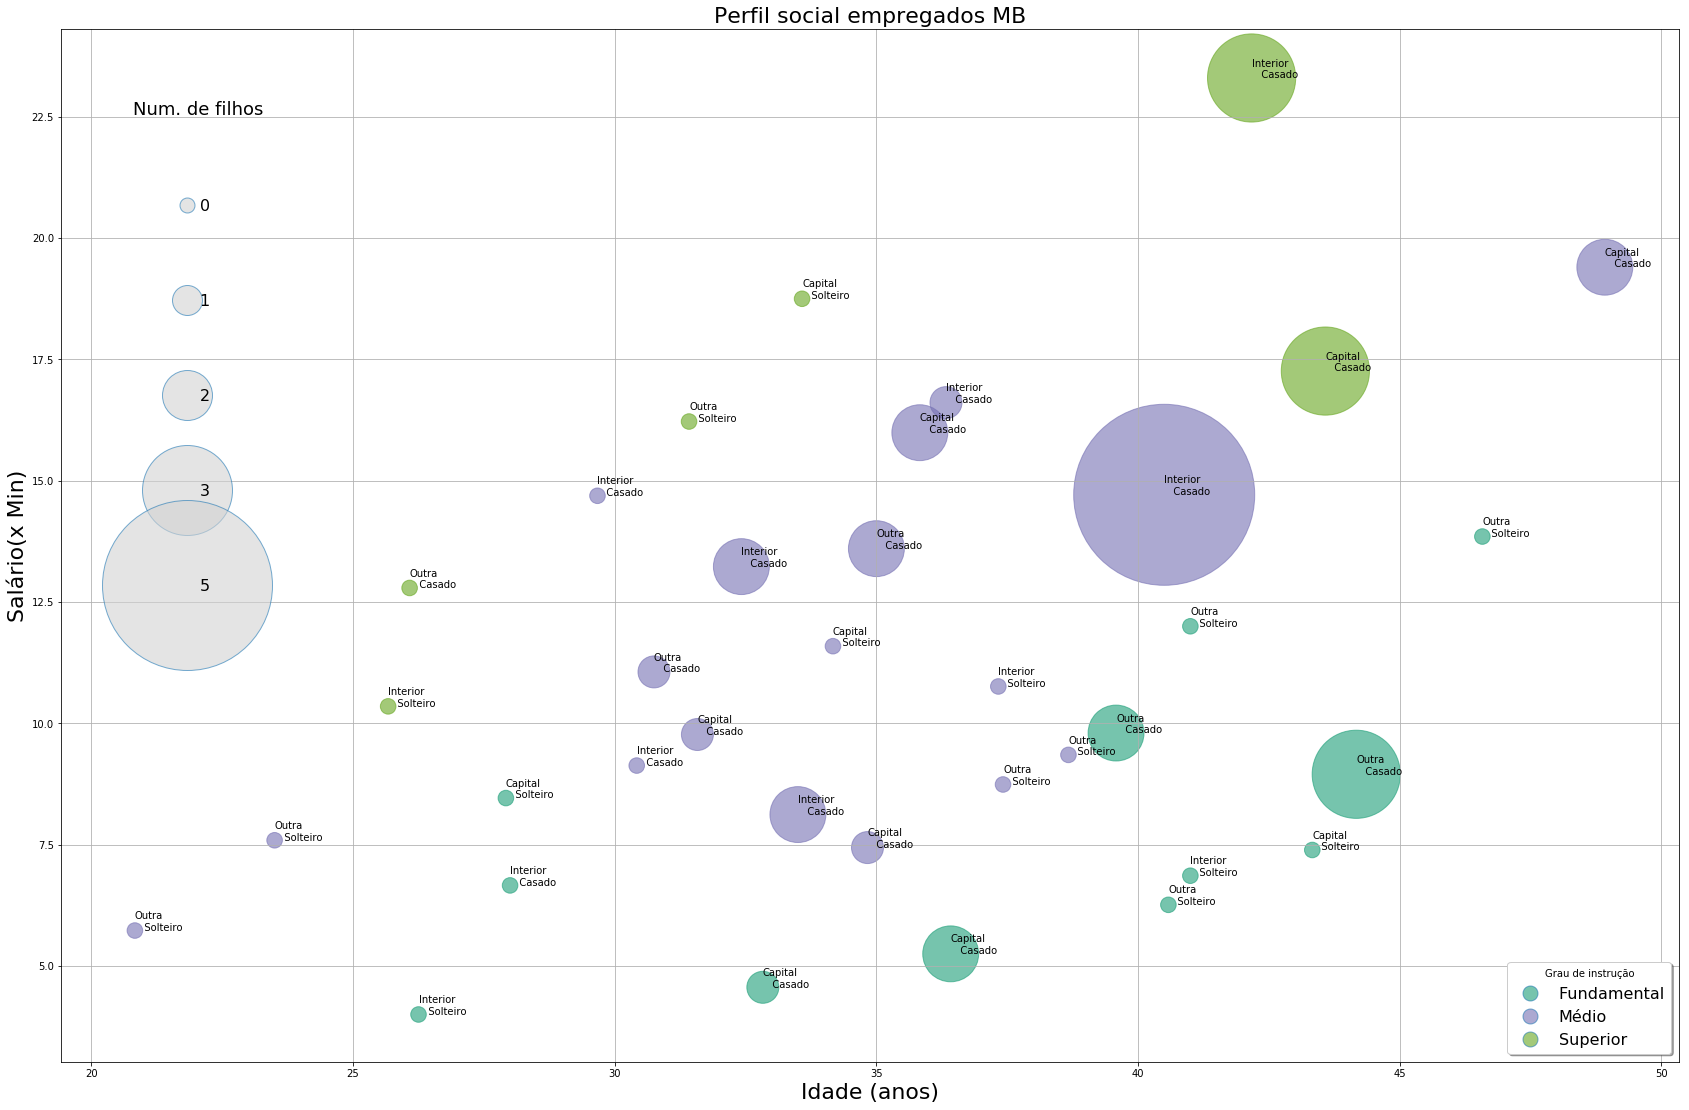

In [139]:
# o grafico em si
plt.figure(figsize=(29,19))
plt.scatter(x = df['Idade_Anos'],
            y = df['Sal_min'],
            s = (df['Num_Filhos']+3*1)**5,
            c = cor_formacao,
            alpha = 0.6)
plt.title('Perfil social empregados MB', fontsize=22)
plt.xlabel('Idade (anos)', fontsize=22)
plt.ylabel('Salário(x Min)', fontsize=22)
plt.grid(True)


for estado in range(len(df['Est_Civil'])):
    plt.text(x = df['Idade_Anos'][estado],
             y = df['Sal_min'][estado],
             s = '\n'+ df['Reg_Proced'][estado]+'\n  '+ df['Est_Civil'][estado],
             fontsize=10)

grau_formacao = ['Fundamental',
                 'Médio',
                 'Superior']

legend1_line2d = list()
for passo in range(len(cores)):
    legend1_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=15,
                                       markerfacecolor=cores[passo]))
 
legend1 = plt.legend(legend1_line2d, grau_formacao, title='Grau de instrução', numpoints=1, fontsize=16, loc="lower right", shadow=True)


legend2_line2d = list()
legend2_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=15,
                                       markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=30,
                                       markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=50,
                                       markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=90,
                                       markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=170,
                                       markerfacecolor='#D3D3D3'))
 
legend2 = plt.legend(legend2_line2d,
                     ['0', '1', '2','3','5'],
                     title='Num. de filhos',
                     numpoints=1,
                     fontsize=16,
                     loc="upper left",
                     frameon=False,  # sem bordas
                     labelspacing=5, # aumenta o espaçamento entre os rótulos
                     handlelength=0, # aumenta o espaçamento entre o objeto e o texto
                     borderpad=4     # aumenta a borda da legenda
                    )
plt.gca().add_artist(legend1)
 
plt.setp(legend2.get_title(),fontsize=18)  # aumentando o tamanho da fonte da legenda
plt.show()

In [140]:
print(df.columns)

Index(['Est_Civil', 'Gr_Instruc', 'Num_Filhos', 'Sal_min', 'Idade_Anos',
       'Reg_Proced'],
      dtype='object')


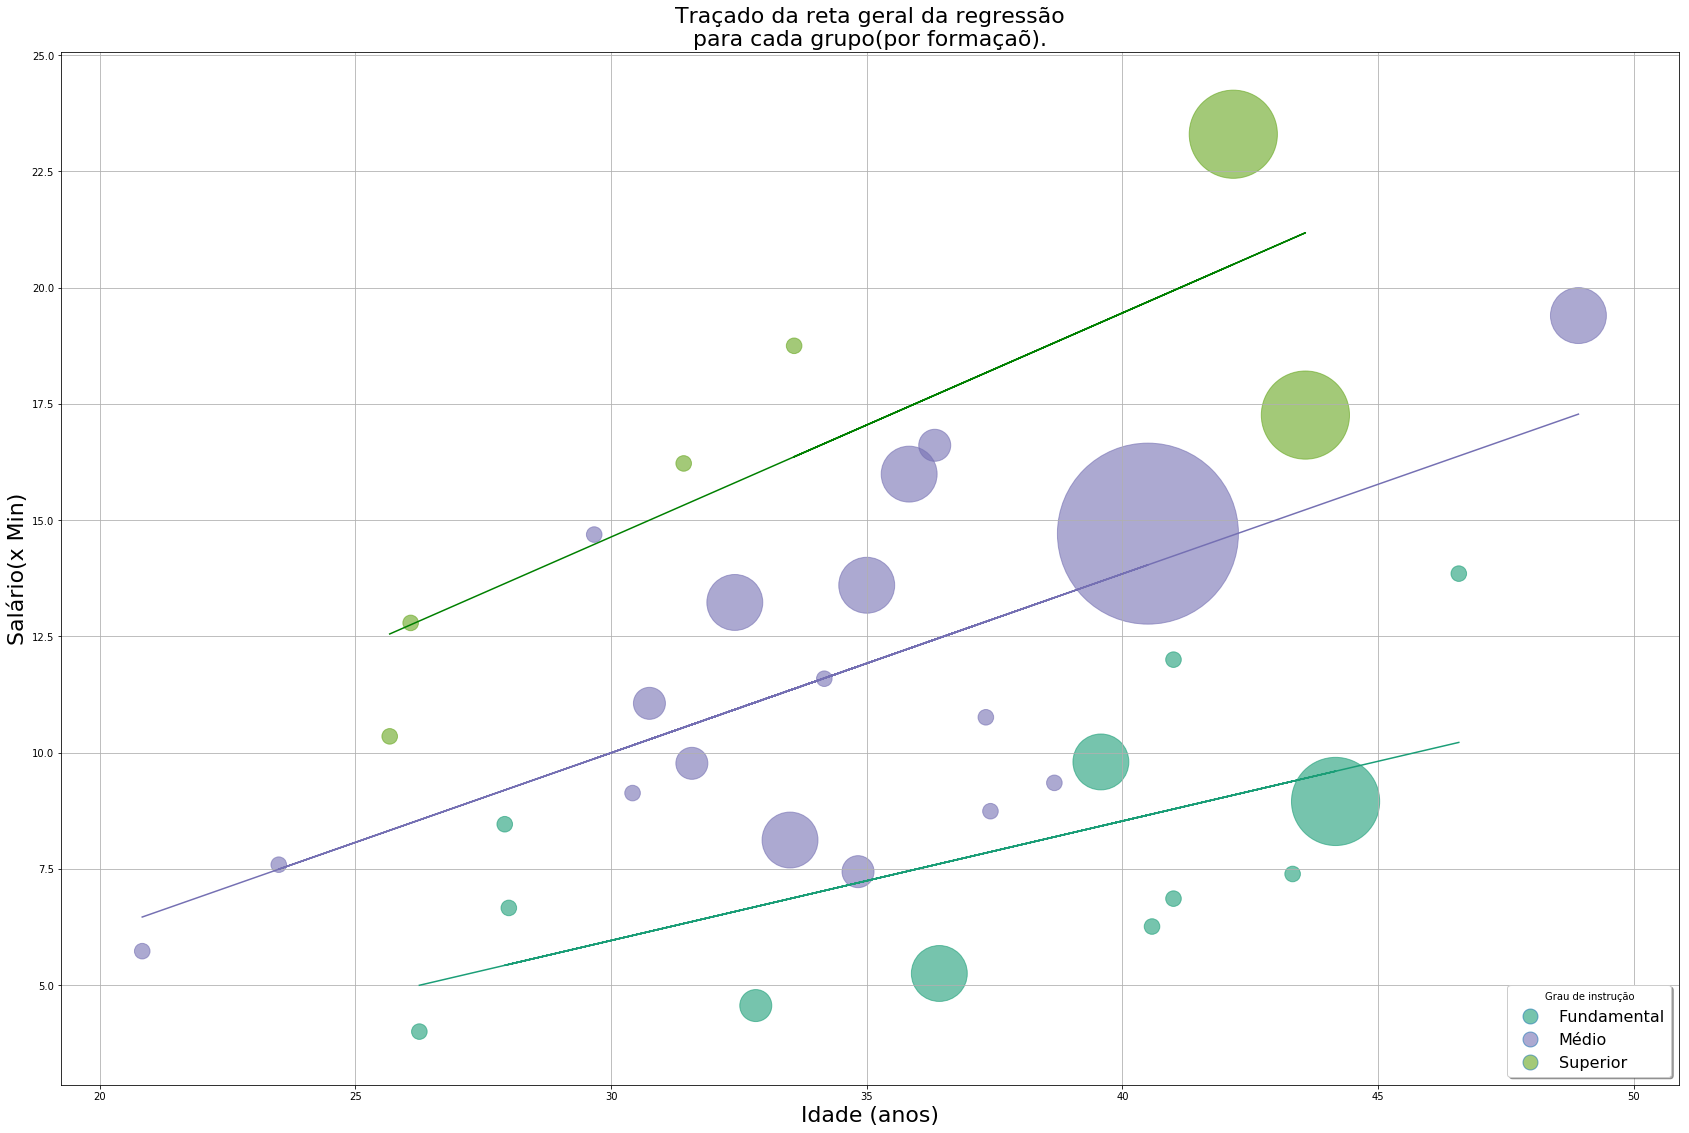

In [156]:
plt.figure(figsize=(29,19))

'''_____________________________traçado das retas para cada grupo(por formaçaõ)______________________________'''

'''        ___________________nivel superior____________________________________________________'''
df_sup = df[(df['Gr_Instruc'] == 'superior')]
xs_range = (df_sup['Idade_Anos'].min, df_sup['Idade_Anos'].max)
ys_range = (df_sup['Sal_min'].min, df_sup['Sal_min'].max)
model = linear_model.LinearRegression(normalize=False, fit_intercept= True)
n = len(df_sup)
X = df_sup['Idade_Anos'].values.reshape((n,1))
y = df_sup['Sal_min'].values
model.fit(X,y)
predicts = model.predict(X)
plt.plot(X, predicts,'g')

'''        ^______________________________________________________________________________________^'''



'''        ___________________nivel medio________________________________________________________'''
df_med = df[(df['Gr_Instruc'] == 'medio')]
xs_range = (df_med['Idade_Anos'].min, df_med['Idade_Anos'].max)
ys_range = (df_med['Sal_min'].min, df_med['Sal_min'].max)
model = linear_model.LinearRegression(normalize=False, fit_intercept= True)
n = len(df_med)
X = df_med['Idade_Anos'].values.reshape((n,1))
y = df_med['Sal_min'].values
model.fit(X,y)
predicts = model.predict(X)
plt.plot(X, predicts,'#7570b3')

'''        ^______________________________________________________________________________________^'''


'''        ___________________nivel fundamental __________________________________________________'''
df_fun = df[(df['Gr_Instruc'] == 'fundamental')]
xs_range = (df_fun['Idade_Anos'].min, df_fun['Idade_Anos'].max)
ys_range = (df_fun['Sal_min'].min, df_fun['Sal_min'].max)
model = linear_model.LinearRegression(normalize=False, fit_intercept= True)
n = len(df_fun)
X = df_fun['Idade_Anos'].values.reshape((n,1))
y = df_fun['Sal_min'].values
model.fit(X,y)
predicts = model.predict(X)
plt.plot(X, predicts,'#1b9e77')

'''        ^______________________________________________________________________________________^'''


plt.scatter(x = df['Idade_Anos'],
            y = df['Sal_min'],
            s = (df['Num_Filhos']+3*1)**5,
            c = cor_formacao,
            alpha = 0.6)
plt.title('Traçado da reta geral da regressão\npara cada grupo(por formaçaõ).', fontsize=22)
plt.xlabel('Idade (anos)', fontsize=22)
plt.ylabel('Salário(x Min)', fontsize=22)

#legenda:
legend1_line2d = list()
for passo in range(len(cores)):
    legend1_line2d.append(mlines.Line2D([0], [0], linestyle="none",
                                       marker="o", alpha=0.6, markersize=15,
                                       markerfacecolor=cores[passo]))
 
legend1 = plt.legend(legend1_line2d, grau_formacao, title='Grau de instrução', numpoints=1, fontsize=16, loc="lower right", shadow=True)
#fim legenda




plt.grid(True,)
